In [1]:
import pandas
import matplotlib
import matplotlib.pyplot
import seaborn
import scipy
import numpy
import sklearn.model_selection
import sklearn.ensemble
import sklearn.preprocessing
import sklearn.metrics
import pulp

In [2]:
def show_pitch(ax):
    
    # Pitch Markings
    ax.axhline(4, linestyle='-', color='white')
    ax.axhline(1.5, linestyle='-', color='white')
    ax.axhline(6.5, linestyle='-', color='white')
    ax.axhline(3.2, linestyle='--', color='white')
    ax.axhline(4.8, linestyle='--', color='white')
    ax.axvline(0.2, linestyle='--', color='white')
    ax.axvline(3.8, linestyle='--', color='white')
    ax.axvline(0.75, linestyle='-.', color='white')
    ax.axvline(3.25, linestyle='-.', color='white')

    # Pitch Color
    ax.set_facecolor('limegreen')
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    
    return ax

def show_team(team, ax):
    
    show_pitch(ax)
    
    team = team.sort_values('POS').reset_index(drop=True)

    coords = [
        (1,5.5),
        (2,5),
        (3,5.5),
        (1.5,2),
        (2.5,2),
        (2,3),
        (1,7),
        (2,7),
        (3,7),
        (1,1),
        (2,0.5),
        (3,1),
        (2,4),
        (1.5,6.25),
        (2.5,6.25)
    ]
    

    for ix, row in team.iterrows():
        ax.text(
            coords[ix][0],
            coords[ix][1],
            '{} ({})'.format(row['NAME'], row['MDP']),
            ha='center',
            va='center',
            fontsize=11,
            color=TEAM_FONT_COLORS[row['TEAM']],
            bbox=dict(
                boxstyle='round,pad=1',
                facecolor=TEAM_COLORS[row['TEAM']],
                alpha=1 
            )
        )

    ax.set_xlim(0,4)
    ax.set_ylim(0,8)
    
    return ax

In [3]:
POSITION_ORDER = ['OB', 'C', 'FH', 'SH', 'BR', 'SR', 'FR']

TEAM_COLORS = {
    'WAL':'red',
    'ENG':'white',
    'IRE':'green',
    'FRA':'mediumblue',
    'SCO':'navy',
    'ITA':'dodgerblue'
}

TEAM_FONT_COLORS = {
    'WAL':'white',
    'ENG':'black',
    'IRE':'white',
    'FRA':'white',
    'SCO':'white',
    'ITA':'white'
}

In [4]:
data = pandas.concat(
    pandas.read_excel(
        '../data/espn_rugby_data.xlsx',
        sheet_name=None
    ),
    ignore_index=True
)

In [5]:
data.head()

,NAME,TEAM,OPP,POS,RATING,2018,SM,SUB,T,A,...,YC,RC,MOM,5T,50M,LO,TSB,PTS,MDP,ROUND
0,B Kinghorn,SCO,ITA,OB,3,9,1,0,3,1,...,0,0,1,2,1,0,0.16,35,28,1
1,G North,WAL,FRA,OB,4,18,1,0,2,0,...,0,0,1,0,1,0,0.24,25,18,1
2,H Slade,ENG,IRE,C,3,0,1,0,2,0,...,0,0,0,2,0,0,0.10,37,14,1
3,M Vunipola,ENG,IRE,FR,5,21,1,0,0,0,...,0,0,1,5,0,0,0.23,16,12,1
4,J May,ENG,IRE,OB,4,42,1,0,1,1,...,0,0,0,1,0,0,0.61,55,11,1


In [6]:
starter_data = data[data['SM']==1]
starter_data.head()

,NAME,TEAM,OPP,POS,RATING,2018,SM,SUB,T,A,...,YC,RC,MOM,5T,50M,LO,TSB,PTS,MDP,ROUND
0,B Kinghorn,SCO,ITA,OB,3,9,1,0,3,1,...,0,0,1,2,1,0,0.16,35,28,1
1,G North,WAL,FRA,OB,4,18,1,0,2,0,...,0,0,1,0,1,0,0.24,25,18,1
2,H Slade,ENG,IRE,C,3,0,1,0,2,0,...,0,0,0,2,0,0,0.10,37,14,1
3,M Vunipola,ENG,IRE,FR,5,21,1,0,0,0,...,0,0,1,5,0,0,0.23,16,12,1
4,J May,ENG,IRE,OB,4,42,1,0,1,1,...,0,0,0,1,0,0,0.61,55,11,1


### Do players score more points against Italy?

In [7]:
data_by_opp = starter_data.groupby('OPP')['MDP'].mean().reset_index()
data_by_opp

,OPP,MDP
0,ENG,4.786667
1,FRA,5.013514
2,IRE,4.880000
3,ITA,6.080000
4,SCO,5.383562
5,WAL,4.260274


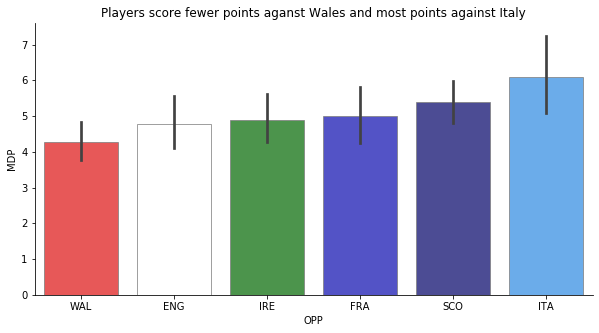

In [8]:
fig, ax = matplotlib.pyplot.subplots(figsize=(10,5))
seaborn.barplot(
    data=starter_data,
    x='OPP',
    y='MDP',
    order=TEAM_COLORS.keys(),
    palette=TEAM_COLORS.values(),
    **{
        'alpha': 0.75,
        'edgecolor': 'grey'
      }
)
seaborn.despine()
ax.set_title('Players score fewer points aganst Wales and most points against Italy')
matplotlib.pyplot.show()

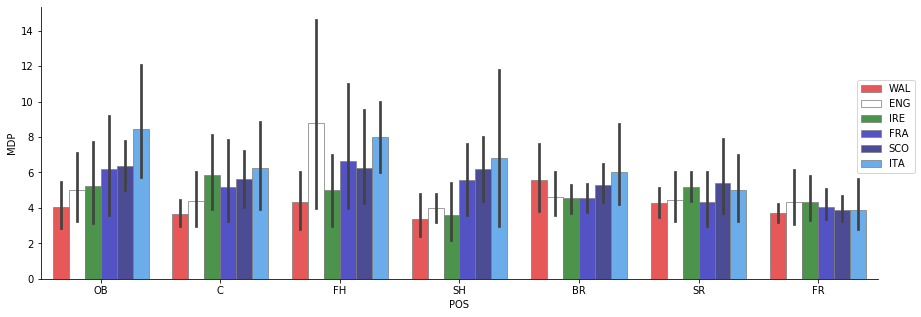

In [9]:
fig, ax = matplotlib.pyplot.subplots(figsize=(15,5))
seaborn.barplot(
    data=starter_data,
    x='POS',
    y='MDP',
    hue='OPP',
    order=POSITION_ORDER,
    hue_order=TEAM_COLORS.keys(),
    palette=TEAM_COLORS.values(),
    **{
        'alpha': 0.75,
        'edgecolor': 'grey'
      }
)
ax.legend(bbox_to_anchor=(1.05, 0.75))
seaborn.despine()
matplotlib.pyplot.show()

### Which positions score most points?

In [10]:
data_by_pos = starter_data.groupby('POS')['MDP'].mean().reset_index()
data_by_pos

,POS,MDP
0,BR,5.086957
1,C,5.166667
2,FH,6.423077
3,FR,4.033708
4,OB,5.937500
5,SH,4.933333
6,SR,4.767857


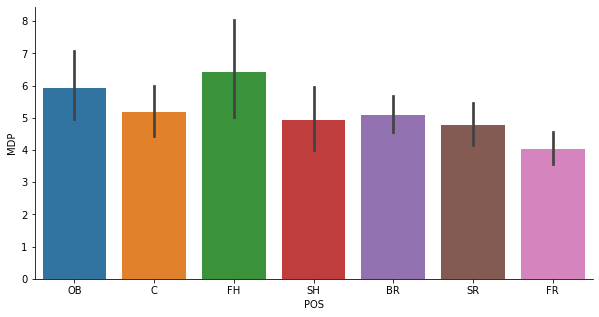

In [11]:
fig, ax = matplotlib.pyplot.subplots(figsize=(10,5))
seaborn.barplot(
    data=starter_data,
    x='POS',
    y='MDP',
    order=POSITION_ORDER
)
seaborn.despine()
matplotlib.pyplot.show()

### Which team scores most points?

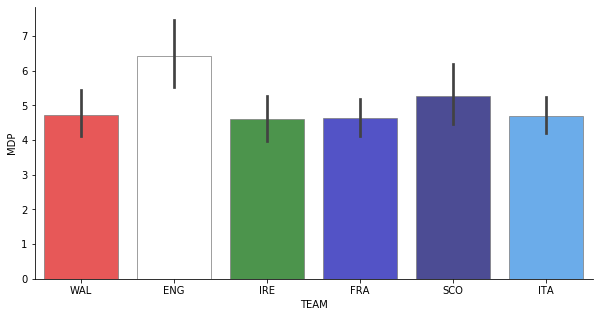

In [12]:
fig, ax = matplotlib.pyplot.subplots(figsize=(10,5))
seaborn.barplot(
    data=starter_data,
    x='TEAM',
    y='MDP',
    order=TEAM_COLORS.keys(),
    palette=TEAM_COLORS.values(),
    **{
        'alpha': 0.75,
        'edgecolor': 'grey'
      }
)
seaborn.despine()
matplotlib.pyplot.show()

### Points scored by position and team

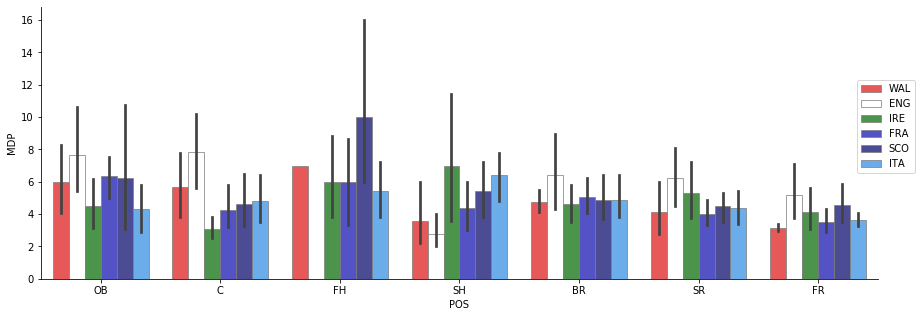

In [13]:
fig, ax = matplotlib.pyplot.subplots(figsize=(15,5))
seaborn.barplot(
    data=starter_data,
    x='POS',
    y='MDP',
    hue='TEAM',
    order=POSITION_ORDER,
    hue_order=TEAM_COLORS.keys(),
    palette=TEAM_COLORS.values(),
    **{
        'alpha': 0.75,
        'edgecolor': 'grey'
      }
)
ax.legend(bbox_to_anchor=(1.05, 0.75))
seaborn.despine()
matplotlib.pyplot.show()

### Do last year's scores correlate with this year?

In [14]:
lastyear = data[data[2018]>0][['NAME',2018]].drop_duplicates()
thisyear = data.groupby('NAME')['MDP'].sum().reset_index()

In [15]:
yoy = pandas.merge(lastyear, thisyear, how='inner', on='NAME')
yoy.columns = ['NAME', '2018', '2019']

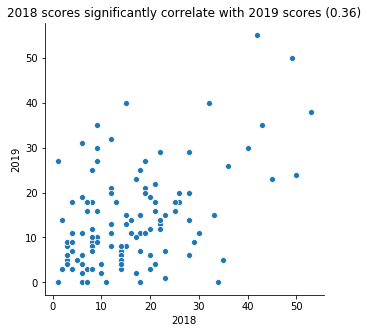

In [16]:
fig, ax = matplotlib.pyplot.subplots(figsize=(5,5))
seaborn.scatterplot(
    data=yoy,
    x='2018',
    y='2019'
)
ax.set_title('2018 scores significantly correlate with 2019 scores ({:.2f})'.format(
    scipy.stats.spearmanr(yoy['2018'], yoy['2019']).correlation
))
seaborn.despine()
matplotlib.pyplot.show()

### Does the concept of "form" exist?

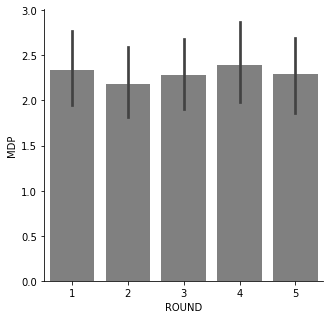

In [17]:
fig, ax = matplotlib.pyplot.subplots(figsize=(5,5))
seaborn.barplot(
    data=data,
    x='ROUND',
    y='MDP',
    color='grey'
)
seaborn.despine()
matplotlib.pyplot.show()

### Predictve model

In [18]:
starter_data[['POS', 'OPP', 'MDP', 'ROUND']].head()

,POS,OPP,MDP,ROUND
0,OB,ITA,28,1
1,OB,FRA,18,1
2,C,IRE,14,1
3,FR,IRE,12,1
4,OB,IRE,11,1


In [19]:
target = 'MDP'
model_data = pandas.get_dummies(
    starter_data[['POS', 'OPP', 'ROUND', target]],
    columns=['POS', 'OPP']
)

train = model_data[model_data['ROUND'].isin([1])]
test = model_data[model_data['ROUND'].isin([2])]

X_train = train[[col for col in train.columns if col!=target]]
y_train = train['MDP']

X_test = test[[col for col in train.columns if col!=target]]
y_test = test['MDP']

In [20]:
rf = sklearn.ensemble.RandomForestRegressor(random_state=1, n_estimators=10)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [21]:
results = pandas.DataFrame({
    'BASELINE': numpy.mean(y_train),
    'PREDICTION': rf.predict(X_test),
    'ACTUAL': y_test,
})
results['PREDICTION'] = results['PREDICTION'].apply(lambda x: round(x))
results.head()

,BASELINE,PREDICTION,ACTUAL
231,5.11236,6,24
232,5.11236,3,16
233,5.11236,7,15
234,5.11236,3,8
235,5.11236,3,8


In [22]:
print('Prediction Error = {:.2f}'.format(
    sklearn.metrics.mean_absolute_error(results['PREDICTION'], results['ACTUAL'])
))
print('Baseline Error = {:.2f}'.format(
    sklearn.metrics.mean_absolute_error(results['BASELINE'], results['ACTUAL'])
))

Prediction Error = 2.33
Baseline Error = 2.17


## Picking a team

In [59]:
predictions = data.merge(results[['PREDICTION']], left_index=True, right_index=True)
predictions = predictions[['NAME','TEAM','OPP','POS','MDP','PREDICTION']]
predictions = predictions.sort_values('NAME')
predictions.head()

,NAME,TEAM,OPP,POS,MDP,PREDICTION
329,A Beard,WAL,ITA,SR,2,3
330,A Davies,WAL,ITA,SH,2,7
257,A Dell,SCO,IRE,FR,6,6
302,A Esposito,ITA,WAL,OB,3,8
254,A Iturria,FRA,ENG,BR,6,5


In [60]:
def create_pulp_varnames(x):
    return 'Player_'+x.replace(" ","_")

In [61]:
predictions['VARNAME'] = predictions['NAME'].apply(lambda x: create_pulp_varnames(x))

In [62]:
predictions

,NAME,TEAM,OPP,POS,MDP,PREDICTION,VARNAME
329,A Beard,WAL,ITA,SR,2,3,Player_A_Beard
330,A Davies,WAL,ITA,SH,2,7,Player_A_Davies
257,A Dell,SCO,IRE,FR,6,6,Player_A_Dell
302,A Esposito,ITA,WAL,OB,3,8,Player_A_Esposito
254,A Iturria,FRA,ENG,BR,6,5,Player_A_Iturria
...,...,...,...,...,...,...,...
299,T Furlong,IRE,SCO,FR,3,4,Player_T_Furlong
326,T Seymour,SCO,IRE,OB,2,8,Player_T_Seymour
282,T Young,WAL,ITA,BR,4,5,Player_T_Young
296,Y Camara,FRA,ENG,BR,3,5,Player_Y_Camara


In [63]:
from pulp import *

In [64]:
# Creates a list of the Ingredients
players = predictions['NAME']
player_points = predictions[['NAME','PREDICTION']].set_index('NAME').to_dict()['PREDICTION']
player_positions = predictions[['NAME','POS']].set_index('NAME').to_dict()['POS']
player_nationality = predictions[['NAME','TEAM']].set_index('NAME').to_dict()['TEAM']

# Nation constraints
wal_nation = {name: 1 if team=='WAL' else 0 for name, team in zip(predictions['VARNAME'], predictions['TEAM'])}
eng_nation = {name: 1 if team=='ENG' else 0 for name, team in zip(predictions['VARNAME'], predictions['TEAM'])}
ire_nation = {name: 1 if team=='IRE' else 0 for name, team in zip(predictions['VARNAME'], predictions['TEAM'])}
fra_nation = {name: 1 if team=='FRA' else 0 for name, team in zip(predictions['VARNAME'], predictions['TEAM'])}
sco_nation = {name: 1 if team=='SCO' else 0 for name, team in zip(predictions['VARNAME'], predictions['TEAM'])}
ita_nation = {name: 1 if team=='ITA' else 0 for name, team in zip(predictions['VARNAME'], predictions['TEAM'])}

# Position constraints
ob_position = {name: 1 if pos=='OB' else 0 for name, pos in zip(predictions['VARNAME'], predictions['POS'])}
c_position = {name: 1 if pos=='C' else 0 for name, pos in zip(predictions['VARNAME'], predictions['POS'])}
fh_position = {name: 1 if pos=='FH' else 0 for name, pos in zip(predictions['VARNAME'], predictions['POS'])}
sh_position = {name: 1 if pos=='SH' else 0 for name, pos in zip(predictions['VARNAME'], predictions['POS'])}
br_position = {name: 1 if pos=='BR' else 0 for name, pos in zip(predictions['VARNAME'], predictions['POS'])}
sr_position = {name: 1 if pos=='SR' else 0 for name, pos in zip(predictions['VARNAME'], predictions['POS'])}
fr_position = {name: 1 if pos=='FR' else 0 for name, pos in zip(predictions['VARNAME'], predictions['POS'])}

In [117]:
# Create the 'prob' variable to contain the problem data
prob = LpProblem("ESPN Fantasy Rugby", LpMaximize)

player_vars = LpVariable.dicts(
    name="Player",
    indexs=players,
    lowBound=0,
    upBound=1
)

# player_variables = {var_name: name for var_name, name in zip(prob.variablesDict().keys(),players)}

# Objective function
prob += lpSum([player_points[i]*player_vars[i] for i in players]), "Total Points Scored"
player_variables = {str(value): key for key, value in zip(players, prob.variables())}

# Include 15 players
prob += lpSum([i for i in prob.variables()]) == 15, "Full Team"

# Include only 4 players from each nation
prob += lpSum([wal_nation[i]*prob.variablesDict()[i] for i in prob.variablesDict().keys()]) <= 4, "WAL_Requirement"
prob += lpSum([eng_nation[i]*prob.variablesDict()[i] for i in prob.variablesDict().keys()]) <= 4, "ENG_Requirement"
prob += lpSum([ire_nation[i]*prob.variablesDict()[i] for i in prob.variablesDict().keys()]) <= 4, "IRE_Requirement"
prob += lpSum([fra_nation[i]*prob.variablesDict()[i] for i in prob.variablesDict().keys()]) <= 4, "FRA_Requirement"
prob += lpSum([sco_nation[i]*prob.variablesDict()[i] for i in prob.variablesDict().keys()]) <= 4, "SCO_Requirement"
prob += lpSum([ita_nation[i]*prob.variablesDict()[i] for i in prob.variablesDict().keys()]) <= 4, "ITA_Requirement"

# Include the right number of players in each position
prob += lpSum([ob_position[i]*prob.variablesDict()[i] for i in prob.variablesDict().keys()]) <= 3, "OB_Requirement"
prob += lpSum([c_position[i]*prob.variablesDict()[i] for i in prob.variablesDict().keys()]) <= 2, "C_Requirement"
prob += lpSum([fh_position[i]*prob.variablesDict()[i] for i in prob.variablesDict().keys()]) <= 1, "FH_Requirement"
prob += lpSum([sh_position[i]*prob.variablesDict()[i] for i in prob.variablesDict().keys()]) <= 1, "SH_Requirement"
prob += lpSum([br_position[i]*prob.variablesDict()[i] for i in prob.variablesDict().keys()]) <= 3, "BR_Requirement"
prob += lpSum([sr_position[i]*prob.variablesDict()[i] for i in prob.variablesDict().keys()]) <= 2, "SR_Requirement"
prob += lpSum([fr_position[i]*prob.variablesDict()[i] for i in prob.variablesDict().keys()]) <= 3, "FR_Requirement"

prob.solve()

1

In [123]:
team = pandas.DataFrame()

for v in prob.variables():
    if v.varValue == 1:
        name = player_variables[v.name]
        team = team.append(pandas.DataFrame({
            'NAME':[name],
            'TEAM': [player_nationality[name]],
            'POS': [player_positions[name]]
        }))
team = team.merge(predictions[['NAME','MDP']], on='NAME')

In [120]:
team

,NAME,TEAM,POS,MDP
0,C Murray,IRE,SH,8
1,D Bamba,FRA,FR,3
2,D Biggar,WAL,FH,7
3,D Sisi,ITA,BR,3
4,G Gilchrist,SCO,SR,6
5,G Guirado,FRA,FR,3
6,H Jones,SCO,C,3
7,J Adams,WAL,OB,8
8,J Holmes,WAL,OB,3
9,J Poirot,FRA,FR,3


In [121]:
print('Predicted Team Points: {}'.format(value(prob.objective)))
print('Actual Team Points: {}'.format(team['MDP'].sum()))

Predicted Team Points: 112.0
Actual Team Points: 75


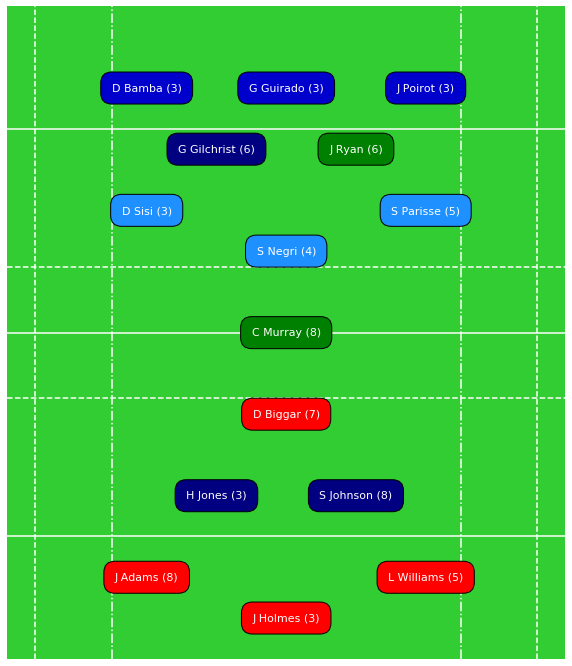

In [122]:
fig, ax = matplotlib.pyplot.subplots(figsize=(10,12))
show_team(team, ax)
matplotlib.pyplot.show()